In [1]:
import numpy as np
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

In [2]:
prices = yf.download(
    ["FDN", "FTXL", "FXD", "FXR", "HDEF"], 
    start="2020-01-01"
)

returns = (
    prices["Adj Close"]
    .pct_change()
    .dropna()
)

[*********************100%***********************]  5 of 5 completed


In [4]:
expected_returns = np.mean(returns, axis=0)
cov_matrix = np.cov(returns, rowvar=False)

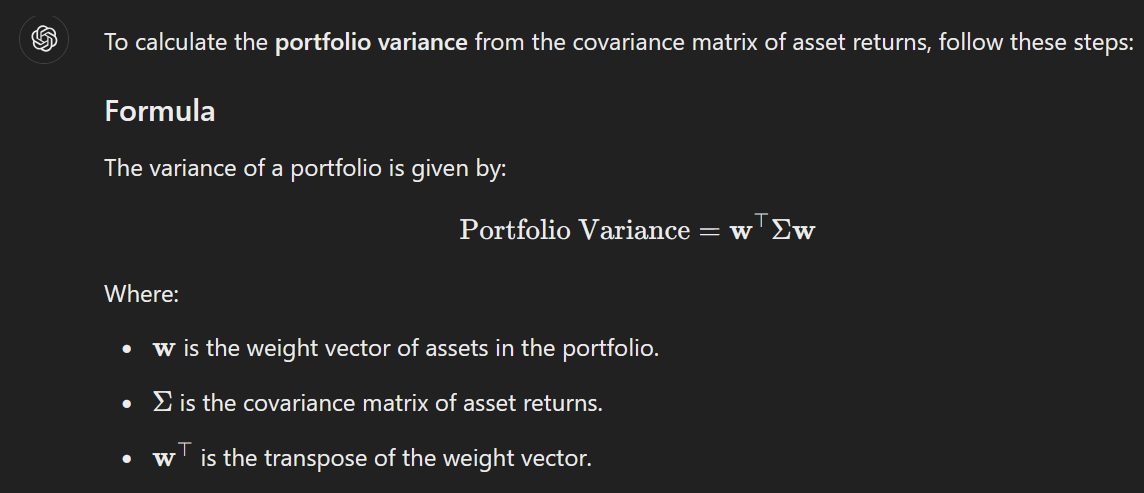

In [13]:
weights = np.array([0.2] * 5)

portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
portfolio_std_dev = np.sqrt(portfolio_variance) * np.sqrt(252)
#To get the annualized standard deviation, we take the square root of the portfolio variance 
#and multiply it by the square root of 252, the typical number of trading days in a year.